# Analyse des données de Demandes de Valeurs Foncières (DVF)

## Importation des modules

In [642]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Préparation des données

In [644]:
url = 'valeursfoncieres-2023.txt'
df = pd.read_csv(url, sep='|', low_memory=False).dropna(axis=1, how='all')
df

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,...,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,1,05/01/2023,Vente,"1070000,00",184.0,NaN,ALL,0124,DES HETRES,1630.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
1,1,05/01/2023,Vente,"1070000,00",159.0,NaN,ALL,0124,DES HETRES,1630.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
2,1,05/01/2023,Vente,"1070000,00",159.0,NaN,ALL,0124,DES HETRES,1630.0,...,NaN,NaN,1,2.0,Appartement,233.0,8.0,NaN,NaN,NaN
3,1,03/01/2023,Vente,"152200,00",2914.0,NaN,RTE,0107,DE PONCIN,1450.0,...,NaN,NaN,0,1.0,Maison,64.0,3.0,S,NaN,988.0
4,1,05/01/2023,Vente,"269000,00",427.0,T,CHE,0040,DE L'AUBEPIN,1800.0,...,NaN,NaN,0,1.0,Maison,73.0,3.0,S,NaN,835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727000,1,05/10/2023,Adjudication,"3931000,00",39.0,NaN,AV,1832,CHARLES FLOQUET,75007.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
3727001,1,05/10/2023,Adjudication,"3931000,00",39.0,NaN,AV,1832,CHARLES FLOQUET,75007.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
3727002,1,05/10/2023,Adjudication,"3931000,00",39.0,NaN,AV,1832,CHARLES FLOQUET,75007.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
3727003,1,28/12/2023,Vente,"98250,00",66.0,B,RUE,8892,SEBASTIEN MERCIER,75015.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN


In [645]:
# On prend le département de Paris
df1 = df[df['Code departement'] == '75']

df1_cleaned = df1.drop(['B/T/Q', 'Voie', 'Code voie', 'Commune', 'No Volume', '1er lot', '2eme lot', '3eme lot', '4eme lot',  '5eme lot', 'Nombre de lots', 'Type local', 'No disposition'], axis=1)
df1_cleaned.isnull().sum()

Date mutation                     0
Nature mutation                   0
Valeur fonciere                 563
No voie                         205
Type de voie                    241
Code postal                     202
Code departement                  0
Code commune                      0
Prefixe de section            80420
Section                           0
No plan                           0
Surface Carrez du 1er lot     51213
Surface Carrez du 2eme lot    71555
Surface Carrez du 3eme lot    79565
Surface Carrez du 4eme lot    80226
Surface Carrez du 5eme lot    80345
Code type local                 804
Surface reelle bati             811
Nombre pieces principales       811
Nature culture                73224
Nature culture speciale       80420
Surface terrain               73224
dtype: int64

In [646]:
df1_cleaned

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,...,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
3646585,03/01/2023,Vente,"1825000,00",89.0,RUE,75001.0,75,101,NaN,AP,...,NaN,NaN,NaN,NaN,4.0,165.0,0.0,NaN,NaN,NaN
3646586,05/01/2023,Vente,"567000,00",51.0,RUE,75010.0,75,110,NaN,AV,...,NaN,NaN,NaN,NaN,4.0,52.0,0.0,NaN,NaN,NaN
3646587,04/01/2023,Vente,"140000,00",178.0,RUE,75017.0,75,117,NaN,BG,...,NaN,NaN,NaN,NaN,2.0,18.0,1.0,NaN,NaN,NaN
3646588,05/01/2023,Vente,"400000,00",12.0,RUE,75009.0,75,109,NaN,BD,...,NaN,NaN,NaN,NaN,2.0,43.0,1.0,NaN,NaN,NaN
3646589,04/01/2023,Vente,"141343,12",63.0,RUE,75018.0,75,118,NaN,AK,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727000,05/10/2023,Adjudication,"3931000,00",39.0,AV,75007.0,75,107,NaN,BU,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,NaN,NaN,NaN
3727001,05/10/2023,Adjudication,"3931000,00",39.0,AV,75007.0,75,107,NaN,BU,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,NaN,NaN,NaN
3727002,05/10/2023,Adjudication,"3931000,00",39.0,AV,75007.0,75,107,NaN,BU,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,NaN,NaN,NaN
3727003,28/12/2023,Vente,"98250,00",66.0,RUE,75015.0,75,115,NaN,FV,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,NaN,NaN,NaN


### Numérisation des données

## Numérisation des données

In [649]:
df1_cleaned['Valeur fonciere'] = df1_cleaned['Valeur fonciere'].str.replace(',', '.').astype(float)

df1_cleaned['Type de voie'] = df1_cleaned['Type de voie'].astype("category").cat.codes
df1_cleaned['Nature mutation'] = df1_cleaned["Nature mutation"].astype("category").cat.codes
df1_cleaned['Nature culture'] = df1_cleaned["Nature culture"].astype("category").cat.codes

df1_cleaned['Nature culture speciale'] = df1_cleaned["Nature culture speciale"].fillna("0").astype("category").cat.codes
df1_cleaned['Nature culture speciale'] = df1_cleaned["Nature culture speciale"].astype("category").cat.codes

df1_cleaned['Section'] = df1_cleaned['Section'].astype("category").cat.codes
df1_cleaned['No voie'] = df1_cleaned['No voie'].astype("category").cat.codes

df1_cleaned.loc[df1_cleaned['Code departement'] == '2A', 'Code departement'] = 200
df1_cleaned.loc[df1_cleaned['Code departement'] == '2B', 'Code departement'] = 201
df1_cleaned['Code departement'] = df1_cleaned['Code departement'].astype(int)

df1_cleaned['Prefixe de section'] = df1_cleaned['Prefixe de section'].fillna(0).astype(int)

#Transformer les surfaces en float
df1_cleaned['Surface Carrez du 1er lot'] = df1_cleaned['Surface Carrez du 1er lot'].str.replace(',', '.').astype(float)
df1_cleaned['Surface Carrez du 2eme lot'] = df1_cleaned['Surface Carrez du 2eme lot'].str.replace(',', '.').astype(float)
df1_cleaned['Surface Carrez du 3eme lot'] = df1_cleaned['Surface Carrez du 3eme lot'].str.replace(',', '.').astype(float)
df1_cleaned['Surface Carrez du 4eme lot'] = df1_cleaned['Surface Carrez du 4eme lot'].str.replace(',', '.').astype(float)
df1_cleaned['Surface Carrez du 5eme lot'] = df1_cleaned['Surface Carrez du 5eme lot'].str.replace(',', '.').astype(float)

#On met les valeurs manquantes à 0 pour les surfaces
df1_cleaned['Surface reelle bati'] = df1_cleaned['Surface reelle bati'].fillna(0)
df1_cleaned['Surface terrain'] = df1_cleaned['Surface terrain'].fillna(0)
df1_cleaned['Surface Carrez du 1er lot'] = df1_cleaned['Surface Carrez du 1er lot'].fillna(0)
df1_cleaned['Surface Carrez du 2eme lot'] = df1_cleaned['Surface Carrez du 2eme lot'].fillna(0)
df1_cleaned['Surface Carrez du 3eme lot'] = df1_cleaned['Surface Carrez du 3eme lot'].fillna(0)
df1_cleaned['Surface Carrez du 4eme lot'] = df1_cleaned['Surface Carrez du 4eme lot'].fillna(0)
df1_cleaned['Surface Carrez du 5eme lot'] = df1_cleaned['Surface Carrez du 5eme lot'].fillna(0)

df1_cleaned['Surface Totale'] = df1_cleaned['Surface reelle bati'] + df1_cleaned['Surface terrain'] + df1_cleaned['Surface Carrez du 1er lot'] + df1_cleaned['Surface Carrez du 2eme lot'] + df1_cleaned['Surface Carrez du 3eme lot'] + df1_cleaned['Surface Carrez du 4eme lot'] + df1_cleaned['Surface Carrez du 5eme lot']

df1_cleaned = df1_cleaned.drop(['Surface terrain', 'Surface reelle bati', 'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot'], axis=1)


In [650]:
df1_cleaned

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Nombre pieces principales,Nature culture,Nature culture speciale,Surface Totale
3646585,03/01/2023,3,1825000.00,88,17,75001.0,75,101,0,15,50,4.0,0.0,-1,0,260.21
3646586,05/01/2023,3,567000.00,50,17,75010.0,75,110,0,21,75,4.0,0.0,-1,0,52.00
3646587,04/01/2023,3,140000.00,177,17,75017.0,75,117,0,32,53,2.0,1.0,-1,0,36.75
3646588,05/01/2023,3,400000.00,11,17,75009.0,75,109,0,29,36,2.0,1.0,-1,0,86.80
3646589,04/01/2023,3,141343.12,62,17,75018.0,75,118,0,10,14,3.0,0.0,-1,0,11.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727000,05/10/2023,0,3931000.00,38,1,75007.0,75,107,0,46,4,3.0,0.0,-1,0,0.00
3727001,05/10/2023,0,3931000.00,38,1,75007.0,75,107,0,46,4,3.0,0.0,-1,0,0.00
3727002,05/10/2023,0,3931000.00,38,1,75007.0,75,107,0,46,4,3.0,0.0,-1,0,0.00
3727003,28/12/2023,3,98250.00,65,17,75015.0,75,115,0,150,100,3.0,0.0,-1,0,0.00


In [651]:
df1_cleaned.isnull().sum()

Date mutation                  0
Nature mutation                0
Valeur fonciere              563
No voie                        0
Type de voie                   0
Code postal                  202
Code departement               0
Code commune                   0
Prefixe de section             0
Section                        0
No plan                        0
Code type local              804
Nombre pieces principales    811
Nature culture                 0
Nature culture speciale        0
Surface Totale                 0
dtype: int64

In [652]:
df1_cleaned = df1_cleaned.dropna(axis=0, how='any')
df1_cleaned.isnull().sum()

Date mutation                0
Nature mutation              0
Valeur fonciere              0
No voie                      0
Type de voie                 0
Code postal                  0
Code departement             0
Code commune                 0
Prefixe de section           0
Section                      0
No plan                      0
Code type local              0
Nombre pieces principales    0
Nature culture               0
Nature culture speciale      0
Surface Totale               0
dtype: int64

In [653]:
df1_cleaned = df1_cleaned.drop_duplicates()

In [654]:
Dates = pd.to_datetime(df1_cleaned['Date mutation'], dayfirst=True)
df1_cleaned_with_dates = df1_cleaned.copy(deep=True)
df1_cleaned = df1_cleaned.drop('Date mutation', axis=1)
df1_cleaned

,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Nombre pieces principales,Nature culture,Nature culture speciale,Surface Totale
3646585,3,1825000.00,88,17,75001.0,75,101,0,15,50,4.0,0.0,-1,0,260.21
3646586,3,567000.00,50,17,75010.0,75,110,0,21,75,4.0,0.0,-1,0,52.00
3646587,3,140000.00,177,17,75017.0,75,117,0,32,53,2.0,1.0,-1,0,36.75
3646588,3,400000.00,11,17,75009.0,75,109,0,29,36,2.0,1.0,-1,0,86.80
3646589,3,141343.12,62,17,75018.0,75,118,0,10,14,3.0,0.0,-1,0,11.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726995,0,144000.00,4,17,75015.0,75,115,0,10,1,2.0,1.0,-1,0,15.00
3726996,0,3931000.00,38,1,75007.0,75,107,0,46,4,3.0,0.0,-1,0,0.00
3726998,0,3931000.00,38,1,75007.0,75,107,0,46,4,2.0,6.0,-1,0,206.00
3727003,3,98250.00,65,17,75015.0,75,115,0,150,100,3.0,0.0,-1,0,0.00


In [655]:
Dates

3646585   2023-01-03
3646586   2023-01-05
3646587   2023-01-04
3646588   2023-01-05
3646589   2023-01-04
             ...    
3726995   2023-02-16
3726996   2023-10-05
3726998   2023-10-05
3727003   2023-12-28
3727004   2023-12-28
Name: Date mutation, Length: 66715, dtype: datetime64[ns]

## Visualisation des données

### Matrice de corrélation

In [658]:
# Matrice de corrélation
correlation_matrix = df1_cleaned.corr()
correlation_matrix

,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Nombre pieces principales,Nature culture,Nature culture speciale,Surface Totale
Nature mutation,1.000000,0.144058,-0.000469,0.008839,0.003033,NaN,0.003033,NaN,0.001671,0.000501,-0.001707,-0.003193,0.028915,NaN,0.031777
Valeur fonciere,0.144058,1.000000,-0.008507,0.005401,-0.089890,NaN,-0.089890,NaN,-0.021945,-0.019400,0.058846,0.007953,0.264298,NaN,0.255642
No voie,-0.000469,-0.008507,1.000000,-0.132931,0.043439,NaN,0.043439,NaN,0.000851,-0.038306,0.010694,-0.007060,-0.001007,NaN,0.010046
Type de voie,0.008839,0.005401,-0.132931,1.000000,-0.029818,NaN,-0.029818,NaN,-0.062402,0.104125,-0.026131,-0.020640,0.016475,NaN,-0.019761
Code postal,0.003033,-0.089890,0.043439,-0.029818,1.000000,NaN,1.000000,NaN,0.363364,0.021442,-0.047378,-0.018628,-0.079898,NaN,-0.049770
Code departement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Code commune,0.003033,-0.089890,0.043439,-0.029818,1.000000,NaN,1.000000,NaN,0.363364,0.021442,-0.047378,-0.018628,-0.079898,NaN,-0.049770
Prefixe de section,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Section,0.001671,-0.021945,0.000851,-0.062402,0.363364,NaN,0.363364,NaN,1.000000,-0.034266,-0.006008,-0.005423,-0.027991,NaN,0.007496
No plan,0.000501,-0.019400,-0.038306,0.104125,0.021442,NaN,0.021442,NaN,-0.034266,1.000000,-0.026243,0.002313,0.036993,NaN,-0.013212


In [659]:
correlation_matrix.isnull().sum()

Nature mutation               3
Valeur fonciere               3
No voie                       3
Type de voie                  3
Code postal                   3
Code departement             15
Code commune                  3
Prefixe de section           15
Section                       3
No plan                       3
Code type local               3
Nombre pieces principales     3
Nature culture                3
Nature culture speciale      15
Surface Totale                3
dtype: int64

C:\Users\olivi\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


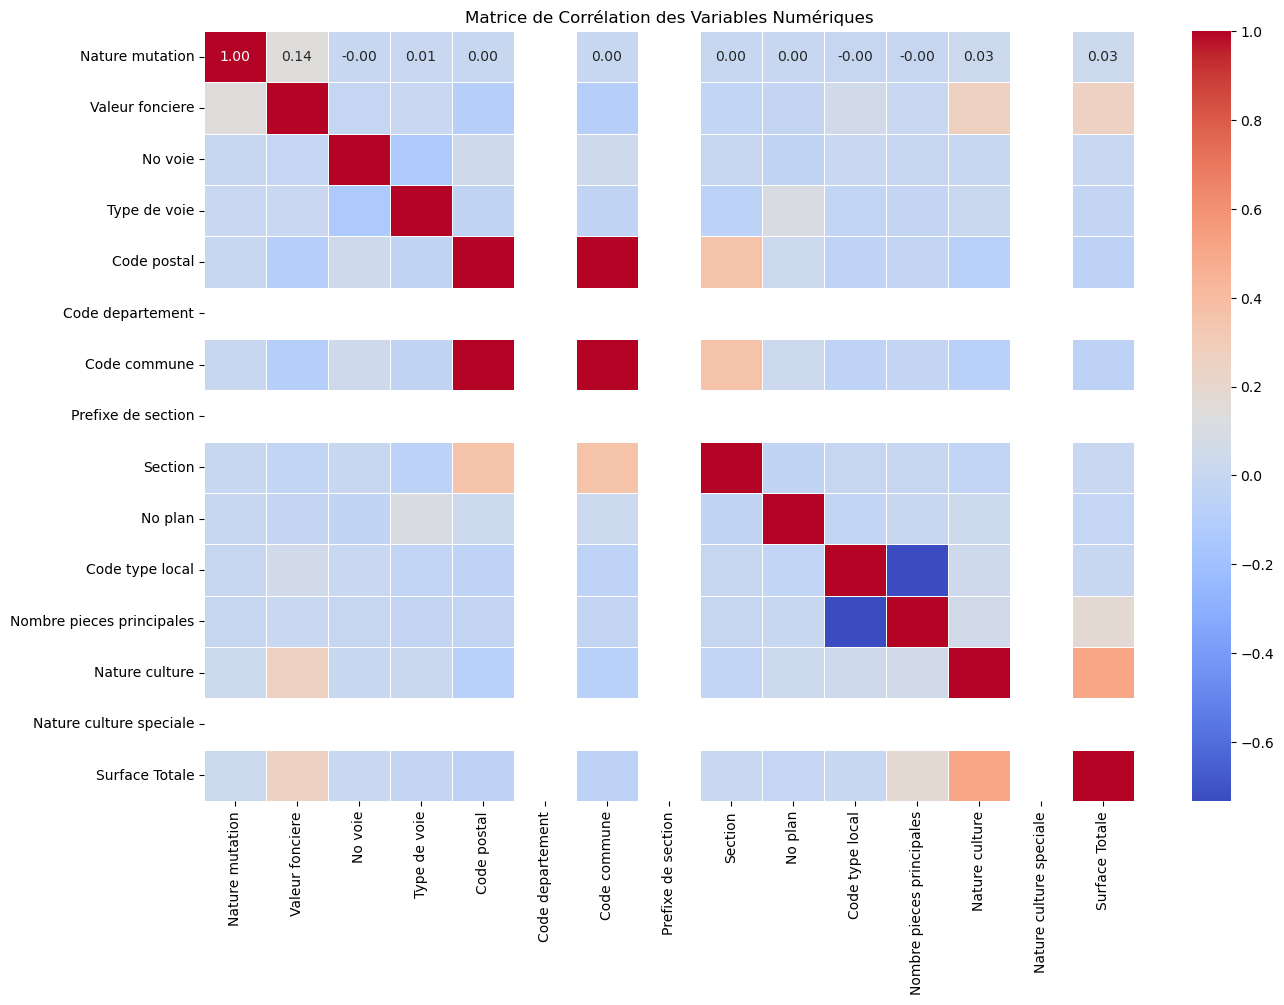

In [660]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()

Répartition des variables

### Date mutation VS Valeur foncière

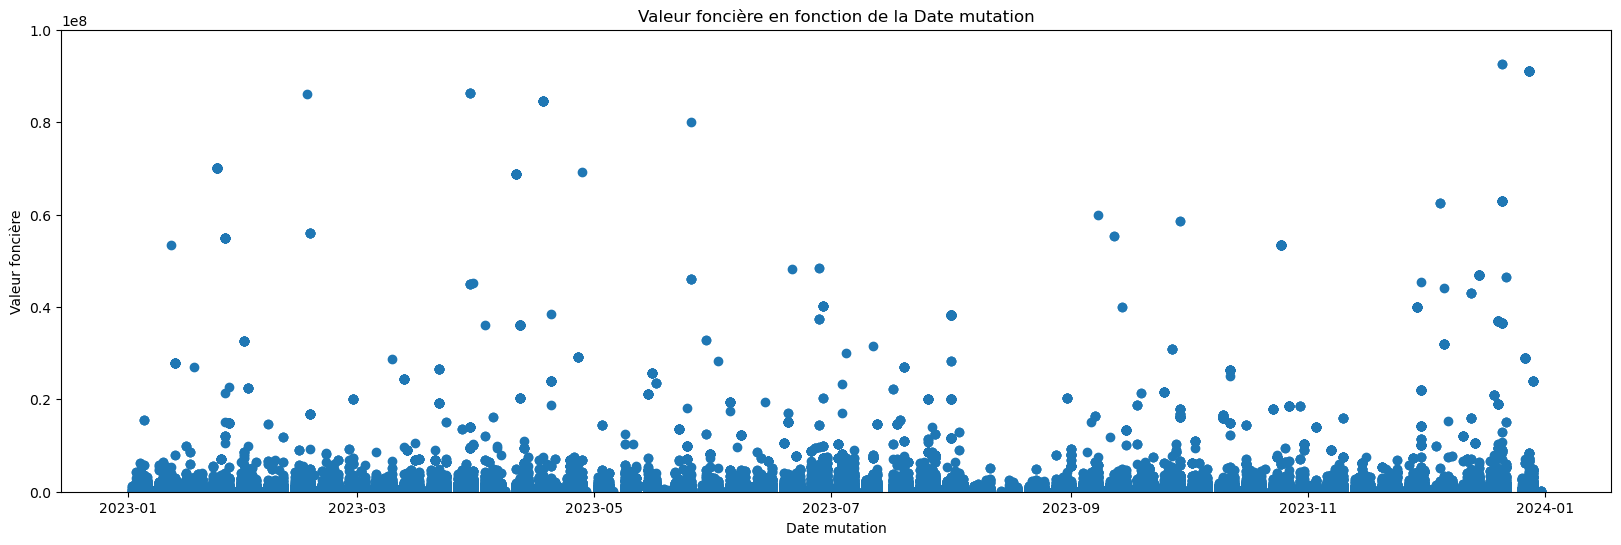

In [663]:
plt.figure(figsize=(20, 6))
plt.scatter(Dates, df1_cleaned['Valeur fonciere'])
plt.ylim(0, 100000000)
plt.xlabel('Date mutation')
plt.ylabel('Valeur foncière')
plt.title('Valeur foncière en fonction de la Date mutation')
plt.show()

On n'observe pas de corrélation entre la date de mutation et la valeur foncière.

### Valeur foncière VS Surface Totale

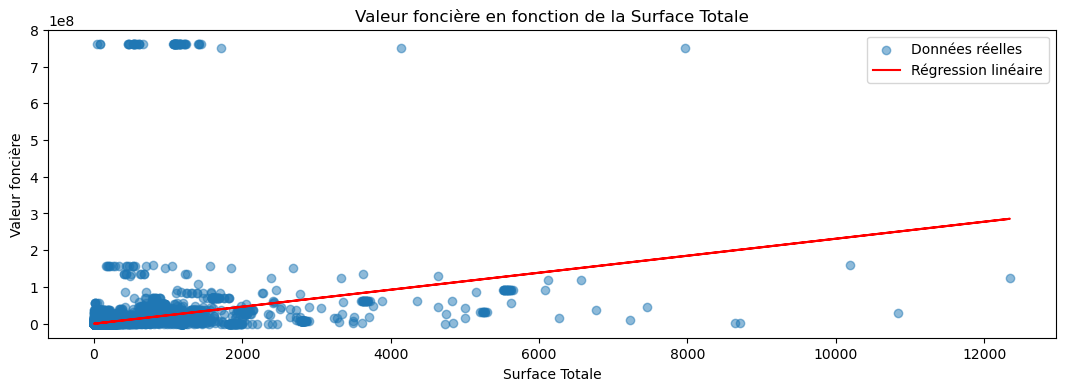

In [666]:

from sklearn.linear_model import LinearRegression

X = df1_cleaned['Surface Totale'].values.reshape(-1, 1)
y = df1_cleaned['Valeur fonciere'].values


model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Tracer le graphique de dispersion avec la régression linéaire
plt.figure(figsize=(13, 4))
plt.scatter(df1_cleaned['Surface Totale'], df1_cleaned['Valeur fonciere'], alpha=0.5, label='Données réelles')
plt.plot(df1_cleaned['Surface Totale'], y_pred, color='red', label='Régression linéaire')
plt.xlabel('Surface Totale')
plt.ylabel('Valeur foncière')
plt.title('Valeur foncière en fonction de la Surface Totale')
plt.legend()
plt.show()



On peut voir que nos données suivent partiellement une regression linéaire pour ces deux variables.

On essaye de faire la même chose mais avec le prix au mètre carré.

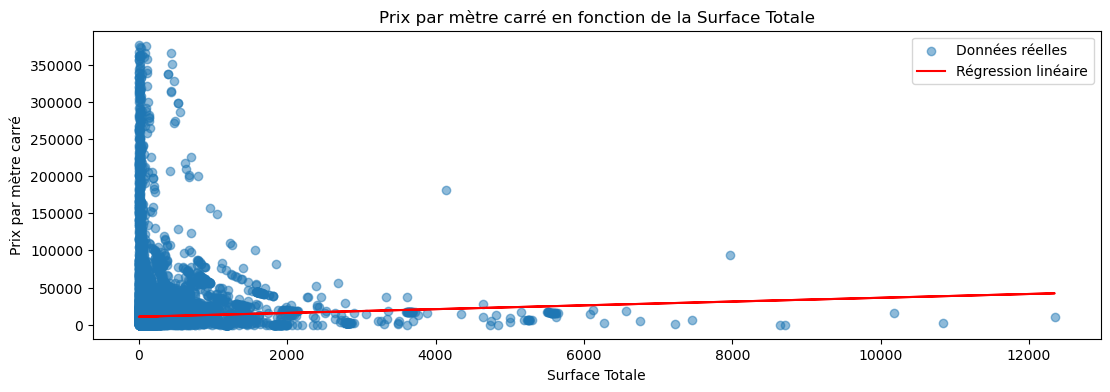

In [669]:
from scipy import stats

# Supprimer les valeurs aberrantes et calculer le prix par mètre carré
df1_cleaned['Prix m2'] = df1_cleaned['Valeur fonciere'] / df1_cleaned['Surface Totale'].replace(0, np.nan)

# Supprimer les lignes avec des valeurs NaN
df1_cleaned.dropna(subset=['Prix m2'], inplace=True)

# Supprimer les valeurs aberrantes
z_scores = stats.zscore(df1_cleaned['Prix m2'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df_cleaned = df1_cleaned[filtered_entries]

# Préparation des données
X = df_cleaned['Surface Totale'].values.reshape(-1, 1)
y = df_cleaned['Prix m2'].values

# Entraînement du modèle
model = LinearRegression()
model.fit(X, y)

# Prédiction
y_pred = model.predict(X)

# Tracé du graphique
plt.figure(figsize=(13, 4))
plt.scatter(df_cleaned['Surface Totale'], df_cleaned['Prix m2'], alpha=0.5, label='Données réelles')
plt.plot(df_cleaned['Surface Totale'], y_pred, color='red', label='Régression linéaire')
plt.xlabel('Surface Totale')
plt.ylabel('Prix par mètre carré')
plt.title('Prix par mètre carré en fonction de la Surface Totale')
plt.legend()
plt.show()



Cela suis également en partie une régression linéaire.

Il y'a donc une corrélation entre le prix au m2 et la surface totale ce qui est logique.

### Code département VS Valeur foncière

In [673]:
df1_cleaned['Code postal']

3646585    75001.0
3646586    75010.0
3646587    75017.0
3646588    75009.0
3646589    75018.0
            ...   
3726993    75016.0
3726994    75015.0
3726995    75015.0
3726998    75007.0
3727004    75015.0
Name: Code postal, Length: 51520, dtype: float64

On utilise la moyenne de la valeur foncière pour chaque code département. Cela permet d'annuler l'effet des valeurs extrêmes.

In [675]:
means_valeur_fonciere = df1_cleaned.groupby('Code postal')['Valeur fonciere'].mean()

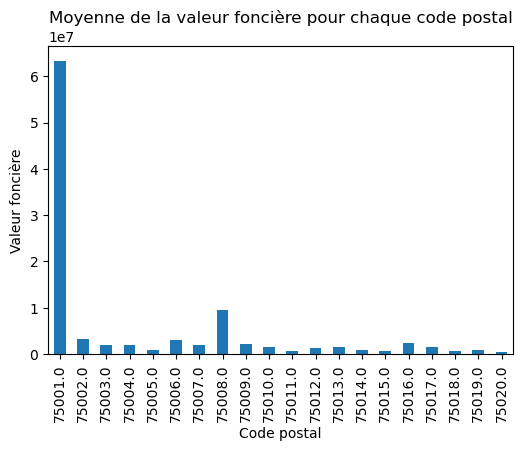

In [676]:
# Moyenen de la valeur foncière pour chaque arrondissement de Paris
plt.figure(figsize=(6, 4))
means_valeur_fonciere.plot(kind='bar')
plt.xlabel('Code postal')
plt.ylabel('Valeur foncière')
plt.title('Moyenne de la valeur foncière pour chaque code postal')
plt.show()

On observe des une valeur foncière moyenne annormalement élevé pour le 1er arrondissement de Paris. Cela est dû à des valeurs extrêmes. On va donc supprimer ces valeurs extrêmes pour mieux visualiser.

In [678]:
import numpy as np

mean_price = df1_cleaned['Valeur fonciere'].mean()
std_dev_price = df1_cleaned['Valeur fonciere'].std()
df1_cleaned['z_score'] = (df1_cleaned['Valeur fonciere'] - mean_price) / std_dev_price
threshold = 3

# Filtrer les observations aberrantes
filtered_data = df1_cleaned[df1_cleaned['z_score'].abs() <= threshold]

# Supprimer la colonne z-score ajoutée
filtered_data.drop('z_score', axis=1, inplace=True)

C:\Users\olivi\AppData\Local\Temp\ipykernel_10148\3671203796.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop('z_score', axis=1, inplace=True)


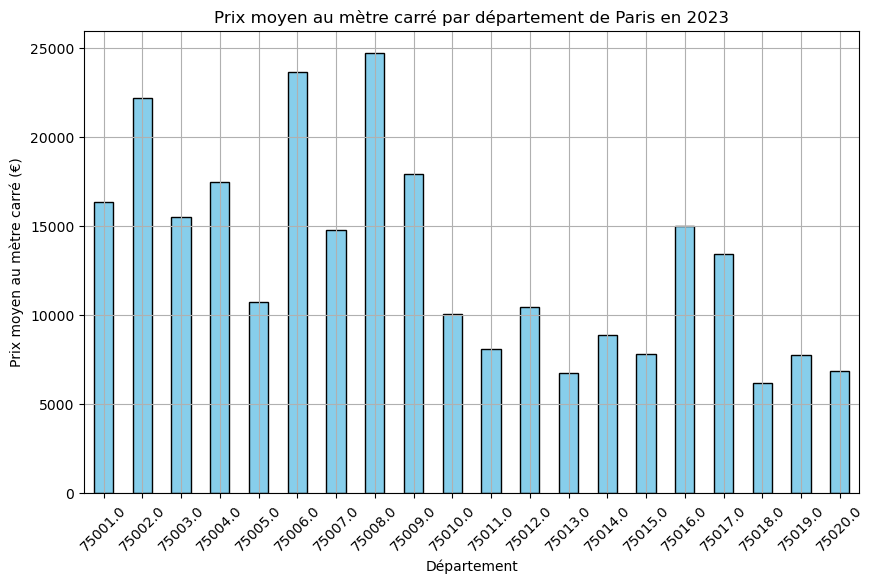

In [679]:
# Calculer le prix moyen au mètre carré pour chaque département
prix_moyen_par_departement = filtered_data.groupby('Code postal')['Valeur fonciere'].mean() / filtered_data.groupby('Code postal')['Surface Totale'].mean()

# Créer un diagramme en barres pour visualiser les prix moyens au mètre carré par département
plt.figure(figsize=(10, 6))
prix_moyen_par_departement.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Prix moyen au mètre carré par département de Paris en 2023')
plt.xlabel('Département')
plt.ylabel('Prix moyen au mètre carré (€)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Nous pouvons donc voir ici qu'en supprimant les valeurs extrèmes nous avons des résultats beaucoup plus cohérents.


On peut donc voir que le prix varie d'un arrondissement à un autre. L'arrondissement a donc un impact sur le prix moyen au mètre carré dans Paris.

### Nature Culture VS Surface Totale

In [683]:
df1_cleaned['Nature culture'].value_counts()

Nature culture
-1    49003
 3     2516
 1        1
Name: count, dtype: int64

On peut voir que nous possédons 2517 valeurs non nulles dans Nature culture et que ces valeurs sont pour la plupart 3 qui signifie S pour sols et 1 qui signifie AG pour terrains d’agrément

         Nature culture  Surface Totale
3646723               3            46.0
3646805               3           604.0
3646806               3           657.0
3646807               3           470.0
3646808               3           538.0


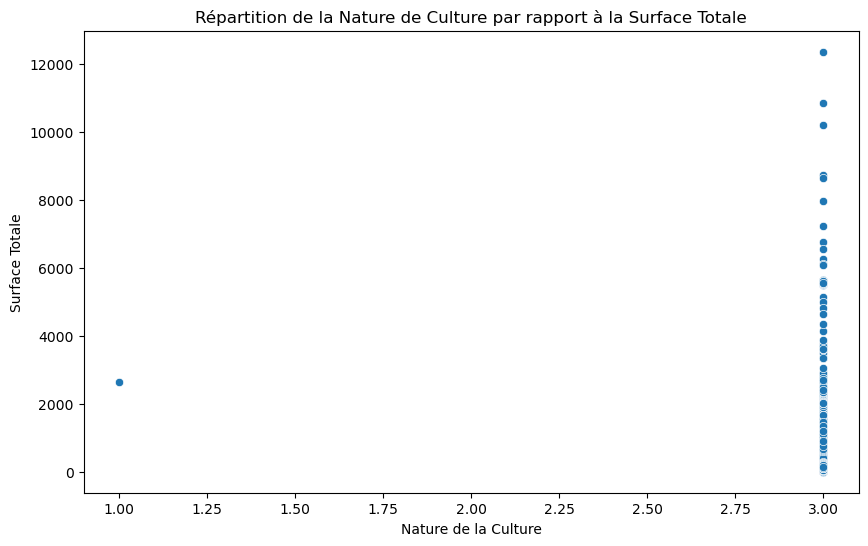

In [685]:
df_filtered = df1_cleaned[df1_cleaned['Nature culture'] != -1]

# Vérification des données
print(df_filtered[['Nature culture', 'Surface Totale']].head())

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Nature culture', y='Surface Totale', data=df_filtered)
plt.ylabel('Surface Totale')
plt.xlabel('Nature de la Culture')
plt.title('Répartition de la Nature de Culture par rapport à la Surface Totale')
plt.show()

La répartition de la nature culture n'a pas vraiment d'impact sur la surface totale des biens immobiliers à Paris.

### Répartition des types de biens à Paris

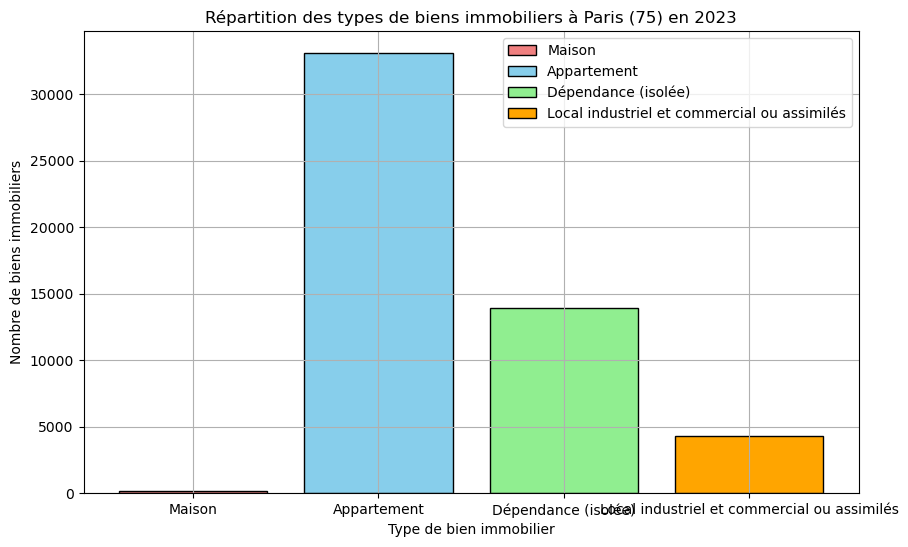

In [688]:
labels = {1: 'Maison', 2: 'Appartement', 3: 'Dépendance (isolée)', 4: 'Local industriel et commercial ou assimilés'}
colors = ['lightcoral', 'skyblue', 'lightgreen', 'orange']

# Grouper les données par type de bien immobilier et compter le nombre de chaque type
grouped_data = df1_cleaned.groupby('Code type local').size().reset_index(name='counts')
grouped_data

# Créer un diagramme en barres empilées
fig, ax = plt.subplots(figsize=(10, 6))

for code, color in zip(sorted(labels.keys()), colors):
    count = grouped_data[grouped_data['Code type local'] == code]['counts'].values
    label = labels[code]
    ax.bar(label, count, color=color, edgecolor='black', label=label)

plt.legend(loc='upper right')
plt.title('Répartition des types de biens immobiliers à Paris (75) en 2023')
plt.xlabel('Type de bien immobilier')
plt.ylabel('Nombre de biens immobiliers')
plt.grid(True)
plt.show()


In [689]:
# Filtrer pour l'année 2023 et pour le type de bien 'Maison'
maisons_2023 = df1_cleaned[(df1_cleaned_with_dates['Code type local'] == 1)]

# Compter le nombre de maisons vendues
nombre_maisons_2023 = maisons_2023.shape[0]
print(f"Nombre de maisons vendues en 2023 : {nombre_maisons_2023}")


Nombre de maisons vendues en 2023 : 177


C:\Users\olivi\AppData\Local\Temp\ipykernel_10148\3302439199.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  maisons_2023 = df1_cleaned[(df1_cleaned_with_dates['Code type local'] == 1)]


On peut voir ici que ,dans Paris, la plupart des ventes, en 2023, sont des appartements et des dépendances. Nous avons seulement 177 ventes de maisons en 2023 ce qui explique pourquoi on ne peux pas l'apercevoir.

C:\Users\olivi\AppData\Local\Temp\ipykernel_10148\77240752.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_filtered['Type de bien'] = df_2023_filtered['Code type local'].map(labels)
C:\Users\olivi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\olivi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


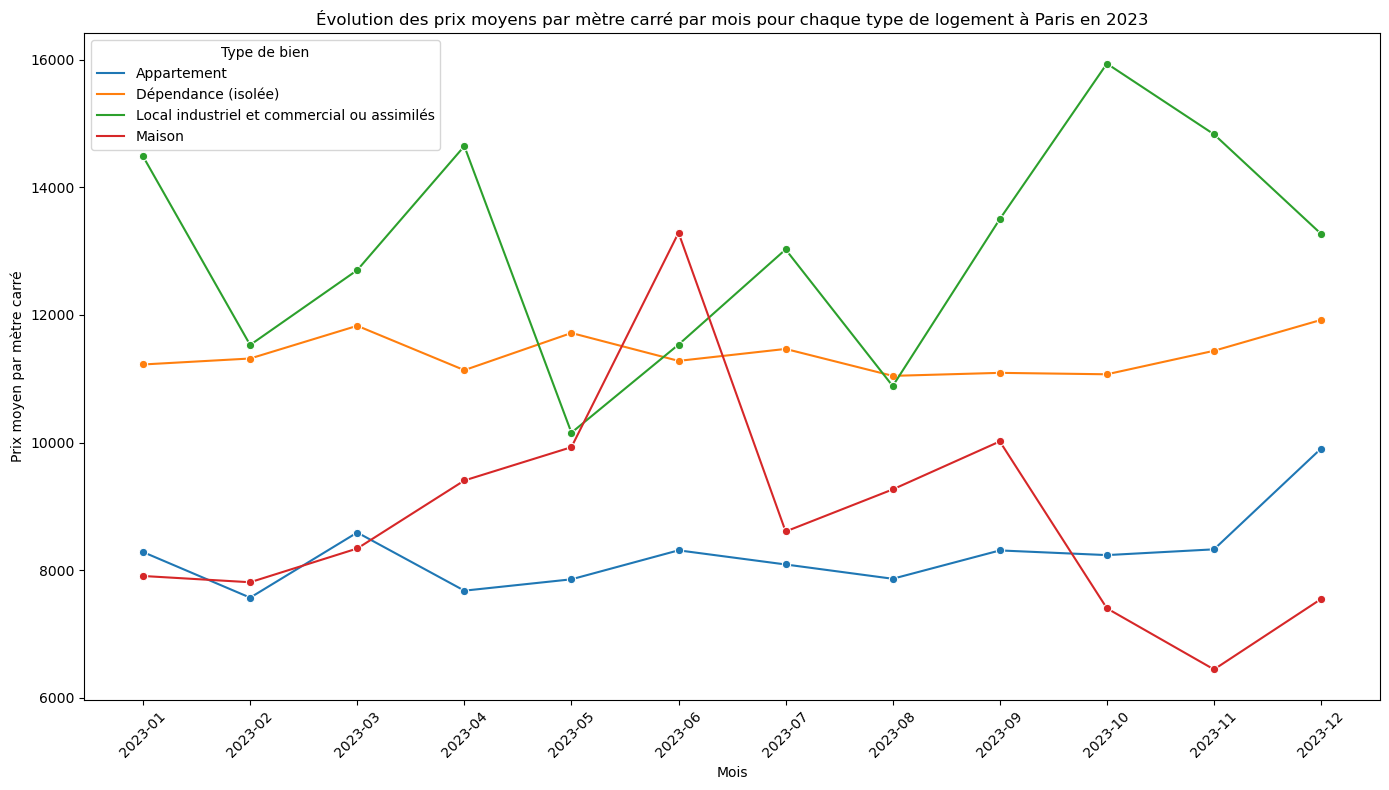

In [691]:
df1_cleaned_with_dates['Date mutation'] = pd.to_datetime(df1_cleaned_with_dates['Date mutation'], dayfirst=True)

df1_cleaned_with_dates['Année'] = df1_cleaned_with_dates['Date mutation'].dt.year
df1_cleaned_with_dates['Mois'] = df1_cleaned_with_dates['Date mutation'].dt.strftime('%Y-%m')

df_2023 = df1_cleaned_with_dates[df1_cleaned_with_dates['Année'] == 2023]

df_2023['Prix m2'] = df_2023['Valeur fonciere'] / df_2023['Surface Totale']

#on essaye ici d'éliminer les valeurs abberrantes
Q1 = df_2023['Prix m2'].quantile(0.25)
Q3 = df_2023['Prix m2'].quantile(0.75)
IQR = Q3 - Q1

df_2023_filtered = df_2023[(df_2023['Prix m2'] >= Q1 - 1.5 * IQR) & (df_2023['Prix m2'] <= Q3 + 1.5 * IQR)]

# Ajouter les labels pour les types locaux
labels = {1: 'Maison', 2: 'Appartement', 3: 'Dépendance (isolée)', 4: 'Local industriel et commercial ou assimilés'}
df_2023_filtered['Type de bien'] = df_2023_filtered['Code type local'].map(labels)

# Calculer le prix moyen par mètre carré pour chaque type de bien et chaque mois sans les valeurs aberrantes
df_mean_prices = df_2023_filtered.groupby(['Mois', 'Type de bien'])['Prix m2'].mean().reset_index()

# Tracer le graphique
plt.figure(figsize=(14, 8))
sns.lineplot(x='Mois', y='Prix m2', hue='Type de bien', data=df_mean_prices, marker='o')
plt.xticks(rotation=45)
plt.xlabel('Mois')
plt.ylabel('Prix moyen par mètre carré')
plt.title('Évolution des prix moyens par mètre carré par mois pour chaque type de logement à Paris en 2023')
plt.legend(title='Type de bien')
plt.tight_layout()
plt.show()

On peut donc voir ici que les appartements et les dépendances n'ont pas vraiment eu une augmentation ou une diminution de leurs prix/m2. Tandis que, pour les locaux industriels ou commerciaux, on peut voir qu'entre août et octobre nous avons un pic d'augmentation ce qui peut correspondre à un achat de locaux pour la rentrée ou le lancement de certaines entreprises. Pour les maisons on peut également voir un pic au niveau de juin 2023.

## [Géomap](https://towardsdatascience.com/how-safe-are-the-streets-of-santiago-e01ba483ce4b) des valeurs foncières

### Import des modules

In [695]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import geoplot as gplt

In [696]:
# Suppression des valeurs extrêmes
df1_cleaned_without_extrem = df1_cleaned[df1_cleaned['Valeur fonciere'] < 700000000]
means_valeur_fonciere_without_extrem = df1_cleaned_without_extrem.groupby('Code postal')['Valeur fonciere'].mean()
means_valeur_fonciere_without_extrem

Code postal
75001.0    2.406453e+06
75002.0    3.355188e+06
75003.0    1.997940e+06
75004.0    2.033195e+06
75005.0    8.949670e+05
75006.0    3.108147e+06
75007.0    1.943828e+06
75008.0    8.008988e+06
75009.0    2.255935e+06
75010.0    1.579077e+06
75011.0    7.126419e+05
75012.0    1.243215e+06
75013.0    1.580790e+06
75014.0    8.215356e+05
75015.0    7.750758e+05
75016.0    2.294805e+06
75017.0    1.574040e+06
75018.0    6.026502e+05
75019.0    8.956613e+05
75020.0    5.211627e+05
Name: Valeur fonciere, dtype: float64

1. On convertit en DataFrame tout en gardant uniquement le numéro de l'arrondissement pour faciliter le merge des prochain dataframe

In [698]:
means_valeur_fonciere_without_extrem_df = pd.DataFrame(list(means_valeur_fonciere_without_extrem.items()), columns=['Code postal', 'Valeur fonciere'])
means_valeur_fonciere_without_extrem_df['Code postal'] = means_valeur_fonciere_without_extrem_df['Code postal'].astype(int)
means_valeur_fonciere_without_extrem_df['Code postal'] = means_valeur_fonciere_without_extrem_df['Code postal'].astype(str).str[-2:].astype(int).astype(object)
means_valeur_fonciere_without_extrem_df = means_valeur_fonciere_without_extrem_df.rename(columns={"Valeur fonciere" : 'valeur_fonciere'})
means_valeur_fonciere_without_extrem_df

,Code postal,valeur_fonciere
0,1,2.406453e+06
1,2,3.355188e+06
2,3,1.997940e+06
3,4,2.033195e+06
4,5,8.949670e+05
5,6,3.108147e+06
6,7,1.943828e+06
7,8,8.008988e+06
8,9,2.255935e+06
9,10,1.579077e+06


2. Les données géographiques vont être récupérées avec un fichier geojson et ensuite stockées dans un DataFrame

In [700]:
# On récupère  les données géographiques des arrondissements de Paris
#path = './map_Paris/arrondissements.shp'

#paris = gpd.read_file(path, encoding='utf-8')
#paris_shape = paris.to_crs('EPSG:4326')

file_path = 'arrondissements.geojson'
paris_shape = gpd.read_file(file_path)

3. Verification de la bonne importation du fichier

In [702]:
paris_shape.head()

,n_sq_ar,c_ar,c_arinsee,l_ar,l_aroff,n_sq_co,surface,perimetre,geom_x_y,geometry
0,750000007,7,75107,7ème Ardt,Palais-Bourbon,750001537,4.090057e+06,8099.424883,"{'lon': 2.3121876953655494, 'lat': 48.85617443...","POLYGON ((2.30088 48.85118, 2.29932 48.85217, ..."
1,750000017,17,75117,17ème Ardt,Batignolles-Monceau,750001537,5.668835e+06,10775.579516,"{'lon': 2.3067769905744084, 'lat': 48.88732652...","POLYGON ((2.29517 48.87396, 2.29504 48.87378, ..."
2,750000001,1,75101,1er Ardt,Louvre,750001537,1.824613e+06,6054.936862,"{'lon': 2.3364433620533878, 'lat': 48.86256270...","POLYGON ((2.32801 48.86992, 2.32997 48.86851, ..."
3,750000003,3,75103,3ème Ardt,Temple,750001537,1.170883e+06,4519.263648,"{'lon': 2.360000985897692, 'lat': 48.862872380...","POLYGON ((2.36383 48.86750, 2.36389 48.86747, ..."
4,750000014,14,75114,14ème Ardt,Observatoire,750001537,5.614877e+06,10317.483310,"{'lon': 2.3265420441989466, 'lat': 48.82924450...","POLYGON ((2.33381 48.84061, 2.33673 48.83965, ..."


4. Numérisation de l'arrondissement 

In [704]:
paris_shape['c_ar'] = paris_shape['c_ar'].astype(int)
paris_shape = paris_shape.sort_values(by='c_ar')

5. On merge le dataframe paris_shape avec means_valeur_fonciere_without_extrem_df

In [706]:
paris_shape = paris_shape.merge(means_valeur_fonciere_without_extrem_df, left_on='c_ar', right_on='Code postal', how='left')
paris_shape.head(10)

,n_sq_ar,c_ar,c_arinsee,l_ar,l_aroff,n_sq_co,surface,perimetre,geom_x_y,geometry,Code postal,valeur_fonciere
0,750000001,1,75101,1er Ardt,Louvre,750001537,1.824613e+06,6054.936862,"{'lon': 2.3364433620533878, 'lat': 48.86256270...","POLYGON ((2.32801 48.86992, 2.32997 48.86851, ...",1,2.406453e+06
1,750000002,2,75102,2ème Ardt,Bourse,750001537,9.911537e+05,4554.104360,"{'lon': 2.3428025468913636, 'lat': 48.86827922...","POLYGON ((2.35152 48.86443, 2.35095 48.86341, ...",2,3.355188e+06
2,750000003,3,75103,3ème Ardt,Temple,750001537,1.170883e+06,4519.263648,"{'lon': 2.360000985897692, 'lat': 48.862872380...","POLYGON ((2.36383 48.86750, 2.36389 48.86747, ...",3,1.997940e+06
3,750000004,4,75104,4ème Ardt,Hôtel-de-Ville,750001537,1.600586e+06,5420.908434,"{'lon': 2.357629620324997, 'lat': 48.854341426...","POLYGON ((2.36851 48.85573, 2.36900 48.85374, ...",4,2.033195e+06
4,750000005,5,75105,5ème Ardt,Panthéon,750001537,2.539375e+06,6239.195396,"{'lon': 2.3507146095752587, 'lat': 48.84444315...","POLYGON ((2.36443 48.84614, 2.36484 48.84584, ...",5,8.949670e+05
5,750000006,6,75106,6ème Ardt,Luxembourg,750001537,2.153096e+06,6483.686786,"{'lon': 2.3328979990533147, 'lat': 48.84913035...","POLYGON ((2.34459 48.85405, 2.34428 48.85375, ...",6,3.108147e+06
6,750000007,7,75107,7ème Ardt,Palais-Bourbon,750001537,4.090057e+06,8099.424883,"{'lon': 2.3121876953655494, 'lat': 48.85617443...","POLYGON ((2.30088 48.85118, 2.29932 48.85217, ...",7,1.943828e+06
7,750000008,8,75108,8ème Ardt,Élysée,750001537,3.880036e+06,7880.533268,"{'lon': 2.312554022402065, 'lat': 48.872720837...","POLYGON ((2.32584 48.86956, 2.32569 48.86954, ...",8,8.008988e+06
8,750000009,9,75109,9ème Ardt,Opéra,750001537,2.178303e+06,6471.588290,"{'lon': 2.3374575434825444, 'lat': 48.87716351...","POLYGON ((2.33978 48.88203, 2.33982 48.88202, ...",9,2.255935e+06
9,750000010,10,75110,10ème Ardt,Entrepôt,750001537,2.891739e+06,6739.375055,"{'lon': 2.360728487847452, 'lat': 48.876130036...","POLYGON ((2.36469 48.88437, 2.36485 48.88436, ...",10,1.579077e+06


6. On drop ensuite la feature code postal car elle est identique à c_ar

In [708]:
paris_shape = paris_shape.drop(columns=['Code postal'])

7. Pour avoir une bonne échelle, on divise par 1 million puis on convertit en float pour rentre les données exploitables

In [710]:
paris_shape['valeur_fonciere'] = paris_shape['valeur_fonciere']/ 1000000

In [711]:
paris_shape['valeur_fonciere'] = paris_shape['valeur_fonciere'].apply(lambda x: '{:.2f}'.format(x))
paris_shape['valeur_fonciere'] = paris_shape['valeur_fonciere'].astype(float)

8. On trie les variables dans l'ordre croissant des arrondissements

In [713]:
paris_shape = paris_shape.sort_values(by='c_ar')

9. On affiche chaque arrondissement de paris selon sa valeur foncière moyenne

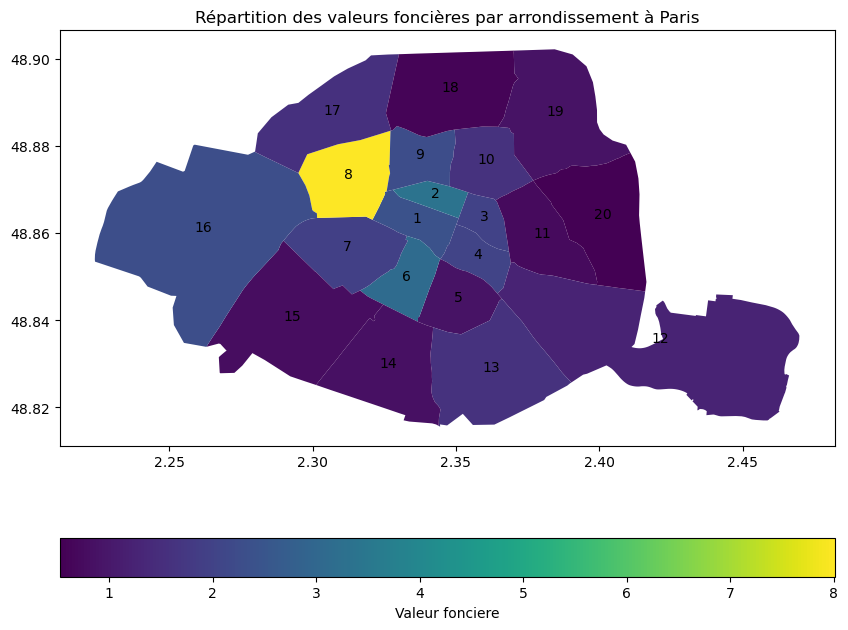

In [715]:
fig, ax= plt.subplots(figsize=(10, 8))
paris_shape.plot(column='valeur_fonciere', cmap='viridis',legend=True, ax=ax, legend_kwds={'label': 'Valeur fonciere', "orientation": 'horizontal'})

for idx, row in paris_shape.iterrows():
    plt.annotate(text=row['c_ar'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), ha='center')

plt.title('Répartition des valeurs foncières par arrondissement à Paris')
plt.show()

# Comparaison avec la ville de Lyon

In [717]:
# On prend le département du Rhône
df2 = df[df["Code departement"] == '69']

#Dans ce département, on selectionne touts les arrondissements de Lyon
df2 = df2[(df2["Code commune"] >= 381) & (df2["Code commune"] <= 389)]

df2_cleaned = df2.drop(['B/T/Q', 'Voie', 'Code voie', 'Commune', 'No Volume', '1er lot', '2eme lot', '3eme lot', '4eme lot',  '5eme lot', 'Nombre de lots', 'Type local', 'No disposition'], axis=1)

In [718]:
df2_cleaned.isnull().sum()

Date mutation                     0
Nature mutation                   0
Valeur fonciere                 137
No voie                         306
Type de voie                    581
Code postal                     250
Code departement                  0
Code commune                      0
Prefixe de section            21467
Section                           0
No plan                           0
Surface Carrez du 1er lot     14493
Surface Carrez du 2eme lot    18659
Surface Carrez du 3eme lot    21136
Surface Carrez du 4eme lot    21412
Surface Carrez du 5eme lot    21452
Code type local                1586
Surface reelle bati            1588
Nombre pieces principales      1588
Nature culture                19650
Nature culture speciale       21408
Surface terrain               19650
dtype: int64

In [719]:
df2_cleaned.sample(8)

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,...,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
2545188,16/01/2023,Vente terrain à bâtir,"2220000,00",56.0,RUE,69007.0,69,387,NaN,CH,...,NaN,NaN,NaN,NaN,4.0,12.0,0.0,NaN,NaN,NaN
2499227,17/02/2023,Vente,"545000,00",15.0,RUE,69002.0,69,382,NaN,AZ,...,NaN,NaN,NaN,NaN,2.0,90.0,4.0,NaN,NaN,NaN
2498080,03/02/2023,Vente,"138000,00",74.0,RUE,69004.0,69,384,NaN,AC,...,NaN,NaN,NaN,NaN,2.0,19.0,2.0,NaN,NaN,NaN
2553813,10/05/2023,Vente en l'état futur d'achèvement,"35000,00",3.0,RUE,69003.0,69,383,NaN,BV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2525472,27/07/2023,Vente,"120000,00",3.0,RUE,69009.0,69,389,NaN,CT,...,"81,35",NaN,NaN,NaN,3.0,0.0,0.0,NaN,NaN,NaN
2560219,17/07/2023,Vente,"402150,00",37.0,CRS,69003.0,69,383,NaN,AM,...,NaN,NaN,NaN,NaN,2.0,82.0,2.0,NaN,NaN,NaN
2516629,14/06/2023,Vente,"475000,00",46.0,RUE,69005.0,69,385,NaN,BO,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,NaN,NaN,NaN
2569243,10/10/2023,Vente,"210000,00",26.0,NaN,69007.0,69,387,NaN,AC,...,NaN,NaN,NaN,NaN,2.0,21.0,1.0,NaN,NaN,NaN


In [720]:
df2_cleaned['Valeur fonciere'] = df2_cleaned['Valeur fonciere'].str.replace(',', '.').astype(float)

df2_cleaned['Type de voie'] = df2_cleaned['Type de voie'].astype("category").cat.codes
df2_cleaned['Nature mutation'] = df2_cleaned["Nature mutation"].astype("category").cat.codes

df2_cleaned['Nature culture'] = df2_cleaned["Nature culture"].astype("category").cat.codes

df2_cleaned['Nature culture speciale'] = df2_cleaned["Nature culture speciale"].fillna("0").astype("category").cat.codes
df2_cleaned['Nature culture speciale'] = df2_cleaned["Nature culture speciale"].astype("category").cat.codes

df2_cleaned['Section'] = df2_cleaned['Section'].astype("category").cat.codes
df2_cleaned['Code type local'] = df2_cleaned['Code type local'].astype("category").cat.codes
df2_cleaned['No voie'] = df2_cleaned['No voie'].astype("category").cat.codes

df2_cleaned.loc[df2_cleaned['Code departement'] == '2A', 'Code departement'] = 200
df2_cleaned.loc[df2_cleaned['Code departement'] == '2B', 'Code departement'] = 201
df2_cleaned['Code departement'] = df2_cleaned['Code departement'].astype(int)

df2_cleaned['Prefixe de section'] = df2_cleaned['Prefixe de section'].fillna(0).astype(int)

# Transformer les surfaces en float
df2_cleaned['Surface Carrez du 1er lot'] = df2_cleaned['Surface Carrez du 1er lot'].str.replace(',', '.').astype(float)
df2_cleaned['Surface Carrez du 2eme lot'] = df2_cleaned['Surface Carrez du 2eme lot'].str.replace(',', '.').astype(float)
df2_cleaned['Surface Carrez du 3eme lot'] = df2_cleaned['Surface Carrez du 3eme lot'].str.replace(',', '.').astype(float)
df2_cleaned['Surface Carrez du 4eme lot'] = df2_cleaned['Surface Carrez du 4eme lot'].str.replace(',', '.').astype(float)
df2_cleaned['Surface Carrez du 5eme lot'] = df2_cleaned['Surface Carrez du 5eme lot'].str.replace(',', '.').astype(float)

# On met les valeurs manquantes à 0 pour les surfaces
df2_cleaned['Surface reelle bati'] = df2_cleaned['Surface reelle bati'].fillna(0)
df2_cleaned['Surface terrain'] = df2_cleaned['Surface terrain'].fillna(0)
df2_cleaned['Surface Carrez du 1er lot'] = df2_cleaned['Surface Carrez du 1er lot'].fillna(0)
df2_cleaned['Surface Carrez du 2eme lot'] = df2_cleaned['Surface Carrez du 2eme lot'].fillna(0)
df2_cleaned['Surface Carrez du 3eme lot'] = df2_cleaned['Surface Carrez du 3eme lot'].fillna(0)
df2_cleaned['Surface Carrez du 4eme lot'] = df2_cleaned['Surface Carrez du 4eme lot'].fillna(0)
df2_cleaned['Surface Carrez du 5eme lot'] = df2_cleaned['Surface Carrez du 5eme lot'].fillna(0)

df2_cleaned['Surface Totale'] = df2_cleaned['Surface reelle bati'] + df2_cleaned['Surface terrain'] + df2_cleaned['Surface Carrez du 1er lot'] + df2_cleaned['Surface Carrez du 2eme lot'] + df2_cleaned['Surface Carrez du 3eme lot'] + df2_cleaned['Surface Carrez du 4eme lot'] + df2_cleaned['Surface Carrez du 5eme lot']

df2_cleaned = df2_cleaned.drop(['Surface terrain', 'Surface reelle bati', 'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot'], axis=1)

In [721]:
df2_cleaned.sample(8)

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Nombre pieces principales,Nature culture,Nature culture speciale,Surface Totale
2512548,17/05/2023,2,285000.0,23,16,69009.0,69,389,0,34,89,2,0.0,-1,0,0.0
2555355,24/05/2023,2,178200.0,50,16,69003.0,69,383,0,30,50,2,0.0,-1,0,0.0
2573128,21/11/2023,2,338000.0,53,2,69007.0,69,387,0,37,96,1,3.0,-1,0,181.3
2559339,30/06/2023,3,3667702.5,102,5,69003.0,69,383,0,46,28,-1,NaN,-1,0,0.0
2507401,24/03/2023,2,652770.0,14,14,69004.0,69,384,0,3,86,2,0.0,-1,0,0.0
2530684,28/09/2023,2,345000.0,20,14,69009.0,69,389,0,21,72,1,3.0,-1,0,61.0
2535564,16/11/2023,2,304300.0,30,16,69009.0,69,389,0,50,15,2,0.0,-1,0,0.0
2555852,22/05/2023,2,255000.0,11,2,69007.0,69,387,0,2,39,2,0.0,-1,0,0.0


In [722]:
df2_cleaned.isnull().sum()

Date mutation                   0
Nature mutation                 0
Valeur fonciere               137
No voie                         0
Type de voie                    0
Code postal                   250
Code departement                0
Code commune                    0
Prefixe de section              0
Section                         0
No plan                         0
Code type local                 0
Nombre pieces principales    1588
Nature culture                  0
Nature culture speciale         0
Surface Totale                  0
dtype: int64

In [723]:
df2_cleaned = df2_cleaned.dropna(axis=0, how='any')
df2_cleaned.isnull().sum()

Date mutation                0
Nature mutation              0
Valeur fonciere              0
No voie                      0
Type de voie                 0
Code postal                  0
Code departement             0
Code commune                 0
Prefixe de section           0
Section                      0
No plan                      0
Code type local              0
Nombre pieces principales    0
Nature culture               0
Nature culture speciale      0
Surface Totale               0
dtype: int64

In [724]:
df2_cleaned = df2_cleaned.drop_duplicates()

In [725]:
df2_cleaned

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Nombre pieces principales,Nature culture,Nature culture speciale,Surface Totale
2495326,03/01/2023,2,335000.00,5,16,69004.0,69,384,0,8,7,1,3.0,-1,0,65.00
2495327,03/01/2023,2,335000.00,5,16,69004.0,69,384,0,8,7,1,2.0,-1,0,139.71
2495330,04/01/2023,2,200000.00,76,5,69002.0,69,382,0,21,84,2,0.0,-1,0,0.00
2495331,04/01/2023,2,200000.00,76,5,69002.0,69,382,0,21,84,1,3.0,-1,0,58.00
2495334,03/01/2023,2,17000.00,42,16,69005.0,69,385,0,30,70,2,0.0,-1,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577944,15/12/2023,2,74000.00,0,16,69008.0,69,388,0,18,151,1,1.0,-1,0,69.64
2577945,15/12/2023,2,74000.00,0,16,69008.0,69,388,0,18,151,1,2.0,-1,0,58.64
2577950,29/12/2023,2,95922.73,68,16,69008.0,69,388,0,3,91,1,1.0,-1,0,44.08
2577965,05/10/2023,0,173000.00,18,16,69008.0,69,388,0,9,119,2,0.0,-1,0,0.00


In [726]:
Dates = pd.to_datetime(df2_cleaned['Date mutation'], dayfirst=True)
df2_cleaned_with_dates = df2_cleaned.copy(deep=True)
df2_cleaned = df2_cleaned.drop('Date mutation', axis=1)

In [727]:
df2_cleaned

,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Nombre pieces principales,Nature culture,Nature culture speciale,Surface Totale
2495326,2,335000.00,5,16,69004.0,69,384,0,8,7,1,3.0,-1,0,65.00
2495327,2,335000.00,5,16,69004.0,69,384,0,8,7,1,2.0,-1,0,139.71
2495330,2,200000.00,76,5,69002.0,69,382,0,21,84,2,0.0,-1,0,0.00
2495331,2,200000.00,76,5,69002.0,69,382,0,21,84,1,3.0,-1,0,58.00
2495334,2,17000.00,42,16,69005.0,69,385,0,30,70,2,0.0,-1,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577944,2,74000.00,0,16,69008.0,69,388,0,18,151,1,1.0,-1,0,69.64
2577945,2,74000.00,0,16,69008.0,69,388,0,18,151,1,2.0,-1,0,58.64
2577950,2,95922.73,68,16,69008.0,69,388,0,3,91,1,1.0,-1,0,44.08
2577965,0,173000.00,18,16,69008.0,69,388,0,9,119,2,0.0,-1,0,0.00


In [728]:
df2_cleaned_without_extrem = df2_cleaned[df2_cleaned['Valeur fonciere'] < 700000000]


In [729]:
prix_moyen_par_departement_lyon = df2_cleaned_without_extrem.groupby('Code postal')['Valeur fonciere'].mean() / df2_cleaned_without_extrem.groupby('Code postal')['Surface Totale'].mean()

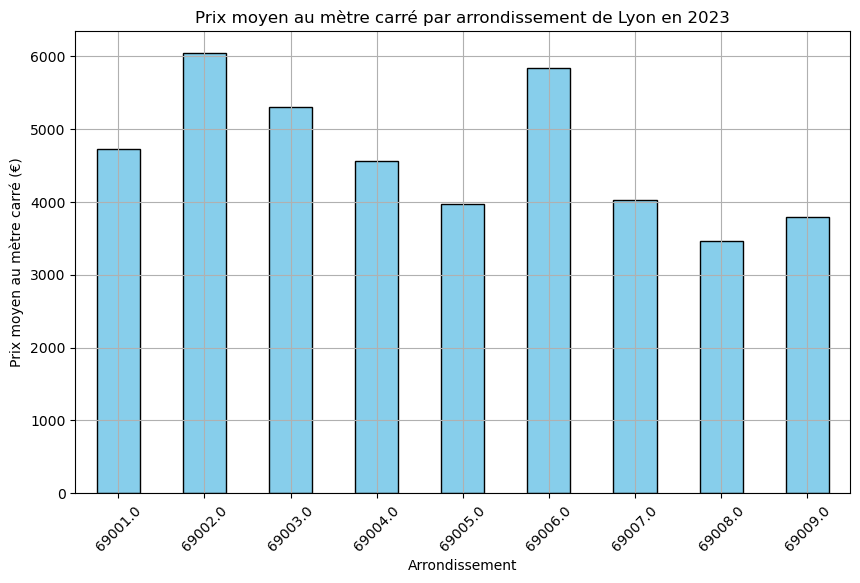

In [730]:
# Créer un diagramme en barres pour visualiser les prix moyens au mètre carré par département
plt.figure(figsize=(10, 6))
prix_moyen_par_departement_lyon.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Prix moyen au mètre carré par arrondissement de Lyon en 2023')
plt.xlabel('Arrondissement')
plt.ylabel('Prix moyen au mètre carré (€)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [731]:
df = pd.DataFrame(list(prix_moyen_par_departement_lyon.items()), columns=['code_postal', 'prix_moyen'])

In [732]:
#on récupère la valeure foncière de chaque arrondissement
valeurs_foncieres_agg = df2_cleaned_without_extrem.groupby('Code commune')['Valeur fonciere'].mean().reset_index()
valeurs_foncieres_agg.columns = ['code_insee', 'valeur_fonciere']
valeurs_foncieres_agg['code_insee'] = valeurs_foncieres_agg['code_insee'].apply(lambda x: int(f'69{x:03d}'))

In [733]:
valeurs_foncieres_agg

,code_insee,valeur_fonciere
0,69381,383618.566878
1,69382,705102.232437
2,69383,540082.911644
3,69384,361858.396492
4,69385,356319.711486
5,69386,532400.210345
6,69387,470035.979839
7,69388,278148.759207
8,69389,366175.555223


In [734]:
import folium
input_file_path = 'metropole-de-lyon_adr_voie_lieu.adrarrond.json'

with open(input_file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Créer un GeoDataFrame à partir des données JSON
gdf = gpd.GeoDataFrame.from_features(data['features'])

if gdf.crs is None:
    gdf.set_crs("EPSG:4326", inplace=True)

In [735]:
gdf

,geometry,nom,nomreduit,insee,datemaj,trigramme,gid
0,"MULTIPOLYGON (((4.81856 45.78944, 4.81817 45.7...",Lyon 4e Arrondissement,Lyon 4,69384,2003-05-12,LY4,29
1,"MULTIPOLYGON (((4.84879 45.71885, 4.84881 45.7...",Lyon 8e Arrondissement,Lyon 8,69388,2011-03-03,LY8,42
2,"MULTIPOLYGON (((4.86994 45.76373, 4.86986 45.7...",Lyon 6e Arrondissement,Lyon 6,69386,2005-07-19,LY6,45
3,"MULTIPOLYGON (((4.81353 45.74819, 4.81357 45.7...",Lyon 5e Arrondissement,Lyon 5,69385,2005-07-19,LY5,53
4,"MULTIPOLYGON (((4.81782 45.72649, 4.81868 45.7...",Lyon 2e Arrondissement,Lyon 2,69382,1997-10-22,LY2,59
5,"MULTIPOLYGON (((4.83901 45.75660, 4.83956 45.7...",Lyon 3e Arrondissement,Lyon 3,69383,2005-07-19,LY3,125
6,"MULTIPOLYGON (((4.83049 45.76454, 4.83125 45.7...",Lyon 1er Arrondissement,Lyon 1,69381,1997-10-22,LY1,128
7,"MULTIPOLYGON (((4.81088 45.78099, 4.81145 45.7...",Lyon 9e Arrondissement,Lyon 9,69389,2005-07-19,LY9,181
8,"MULTIPOLYGON (((4.83770 45.70737, 4.83894 45.7...",Lyon 7e Arrondissement,Lyon 7,69387,2000-03-30,LY7,189


In [736]:
gdf['insee'] = gdf['insee'].astype(int)
gdf = gdf.merge(valeurs_foncieres_agg, left_on='insee', right_on='code_insee', how='left')

In [737]:
gdf

,geometry,nom,nomreduit,insee,datemaj,trigramme,gid,code_insee,valeur_fonciere
0,"MULTIPOLYGON (((4.81856 45.78944, 4.81817 45.7...",Lyon 4e Arrondissement,Lyon 4,69384,2003-05-12,LY4,29,69384,361858.396492
1,"MULTIPOLYGON (((4.84879 45.71885, 4.84881 45.7...",Lyon 8e Arrondissement,Lyon 8,69388,2011-03-03,LY8,42,69388,278148.759207
2,"MULTIPOLYGON (((4.86994 45.76373, 4.86986 45.7...",Lyon 6e Arrondissement,Lyon 6,69386,2005-07-19,LY6,45,69386,532400.210345
3,"MULTIPOLYGON (((4.81353 45.74819, 4.81357 45.7...",Lyon 5e Arrondissement,Lyon 5,69385,2005-07-19,LY5,53,69385,356319.711486
4,"MULTIPOLYGON (((4.81782 45.72649, 4.81868 45.7...",Lyon 2e Arrondissement,Lyon 2,69382,1997-10-22,LY2,59,69382,705102.232437
5,"MULTIPOLYGON (((4.83901 45.75660, 4.83956 45.7...",Lyon 3e Arrondissement,Lyon 3,69383,2005-07-19,LY3,125,69383,540082.911644
6,"MULTIPOLYGON (((4.83049 45.76454, 4.83125 45.7...",Lyon 1er Arrondissement,Lyon 1,69381,1997-10-22,LY1,128,69381,383618.566878
7,"MULTIPOLYGON (((4.81088 45.78099, 4.81145 45.7...",Lyon 9e Arrondissement,Lyon 9,69389,2005-07-19,LY9,181,69389,366175.555223
8,"MULTIPOLYGON (((4.83770 45.70737, 4.83894 45.7...",Lyon 7e Arrondissement,Lyon 7,69387,2000-03-30,LY7,189,69387,470035.979839


# Geomap de Lyon

In [738]:
m1 = folium.Map(location=[45.75, 4.85], zoom_start=12)

folium.Choropleth(
    geo_data=gdf,
    name='choropleth',
    data=gdf,
    columns=['nom', 'valeur_fonciere'],
    key_on='feature.properties.nom',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Valeur Foncière'
).add_to(m1)

# Ajouter des popups avec les noms des arrondissements et leur valeur foncière
for idx, row in gdf.iterrows():
    folium.GeoJson(
        row['geometry'],
        name=row['nom'],
        tooltip=folium.Tooltip(f"{row['nom']}: {row['valeur_fonciere']} €")
    ).add_to(m1)


In [739]:
folium.LayerControl().add_to(m1)

In [740]:
display(m1)

In [741]:
prix_moyen_par_departement_lyon= pd.DataFrame(prix_moyen_par_departement_lyon)
prix_moyen_par_departement_lyon

,0
Code postal,
69001.0,4724.478819
69002.0,6045.107825
69003.0,5298.982310
69004.0,4562.436461
69005.0,3970.649780
69006.0,5840.243794
69007.0,4023.705345
69008.0,3463.104458
69009.0,3786.979650


In [742]:
prix_lyon_df = df2_cleaned_without_extrem.merge(prix_moyen_par_departement_lyon, left_on='Code postal', right_on='Code postal', how='left')


In [743]:
prix_lyon_df= prix_lyon_df.rename(columns={0: "Prix m²"})
prix_lyon_df['Code commune'] = prix_lyon_df['Code commune'].apply(lambda x: int(f'69{x:03d}'))

In [744]:
prix_lyon_df

,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Nombre pieces principales,Nature culture,Nature culture speciale,Surface Totale,Prix m²
0,2,335000.00,5,16,69004.0,69,69384,0,8,7,1,3.0,-1,0,65.00,4562.436461
1,2,335000.00,5,16,69004.0,69,69384,0,8,7,1,2.0,-1,0,139.71,4562.436461
2,2,200000.00,76,5,69002.0,69,69382,0,21,84,2,0.0,-1,0,0.00,6045.107825
3,2,200000.00,76,5,69002.0,69,69382,0,21,84,1,3.0,-1,0,58.00,6045.107825
4,2,17000.00,42,16,69005.0,69,69385,0,30,70,2,0.0,-1,0,0.00,3970.649780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16453,2,74000.00,0,16,69008.0,69,69388,0,18,151,1,1.0,-1,0,69.64,3463.104458
16454,2,74000.00,0,16,69008.0,69,69388,0,18,151,1,2.0,-1,0,58.64,3463.104458
16455,2,95922.73,68,16,69008.0,69,69388,0,3,91,1,1.0,-1,0,44.08,3463.104458
16456,0,173000.00,18,16,69008.0,69,69388,0,9,119,2,0.0,-1,0,0.00,3463.104458


In [745]:
new_df = prix_lyon_df[["Code commune","Prix m²"]]
new_df

,Code commune,Prix m²
0,69384,4562.436461
1,69384,4562.436461
2,69382,6045.107825
3,69382,6045.107825
4,69385,3970.649780
...,...,...
16453,69388,3463.104458
16454,69388,3463.104458
16455,69388,3463.104458
16456,69388,3463.104458


In [814]:
gdf = gdf.merge(new_df, left_on='insee', right_on='Code commune', how='left')

In [816]:
gdf

,geometry,nom,nomreduit,insee,datemaj,trigramme,gid,code_insee,valeur_fonciere,Code commune,Prix m²
0,"MULTIPOLYGON (((4.81856 45.78944, 4.81817 45.7...",Lyon 4e Arrondissement,Lyon 4,69384,2003-05-12,LY4,29,69384,361858.396492,69384,4562.436461
1,"MULTIPOLYGON (((4.81856 45.78944, 4.81817 45.7...",Lyon 4e Arrondissement,Lyon 4,69384,2003-05-12,LY4,29,69384,361858.396492,69384,4562.436461
2,"MULTIPOLYGON (((4.81856 45.78944, 4.81817 45.7...",Lyon 4e Arrondissement,Lyon 4,69384,2003-05-12,LY4,29,69384,361858.396492,69384,4562.436461
3,"MULTIPOLYGON (((4.81856 45.78944, 4.81817 45.7...",Lyon 4e Arrondissement,Lyon 4,69384,2003-05-12,LY4,29,69384,361858.396492,69384,4562.436461
4,"MULTIPOLYGON (((4.81856 45.78944, 4.81817 45.7...",Lyon 4e Arrondissement,Lyon 4,69384,2003-05-12,LY4,29,69384,361858.396492,69384,4562.436461
...,...,...,...,...,...,...,...,...,...,...,...
16453,"MULTIPOLYGON (((4.83770 45.70737, 4.83894 45.7...",Lyon 7e Arrondissement,Lyon 7,69387,2000-03-30,LY7,189,69387,470035.979839,69387,4023.705345
16454,"MULTIPOLYGON (((4.83770 45.70737, 4.83894 45.7...",Lyon 7e Arrondissement,Lyon 7,69387,2000-03-30,LY7,189,69387,470035.979839,69387,4023.705345
16455,"MULTIPOLYGON (((4.83770 45.70737, 4.83894 45.7...",Lyon 7e Arrondissement,Lyon 7,69387,2000-03-30,LY7,189,69387,470035.979839,69387,4023.705345
16456,"MULTIPOLYGON (((4.83770 45.70737, 4.83894 45.7...",Lyon 7e Arrondissement,Lyon 7,69387,2000-03-30,LY7,189,69387,470035.979839,69387,4023.705345


In [818]:

gdf = gdf.drop_duplicates()


In [820]:
m2 = folium.Map(location=[45.75, 4.85], zoom_start=12)

folium.Choropleth(
    geo_data=gdf,
    name='choropleth',
    data=gdf,
    columns=['nom', 'Prix m²'],
    key_on='feature.properties.nom',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Prix m²'
).add_to(m2)

# Ajouter des popups avec les noms des arrondissements et leur valeur foncière
for idx, row in gdf.iterrows():
    folium.GeoJson(
        row['geometry'],
        name=row['nom'],
        tooltip=folium.Tooltip(f"{row['nom']}: {row['Prix m²']} €")
    ).add_to(m2)

folium.LayerControl().add_to(m2)

display(m2)

In [844]:
prix_moyen_par_departement = filtered_data.groupby('Code postal')['Valeur fonciere'].mean() / filtered_data.groupby('Code postal')['Surface Totale'].mean()
prix_moyen_par_departement_lyon = df2_cleaned_without_extrem.groupby('Code postal')['Valeur fonciere'].mean() / df2_cleaned_without_extrem.groupby('Code postal')['Surface Totale'].mean()

# Comparaison du prix au mètre carré de Paris et Marseille

<Figure size 1200x800 with 0 Axes>

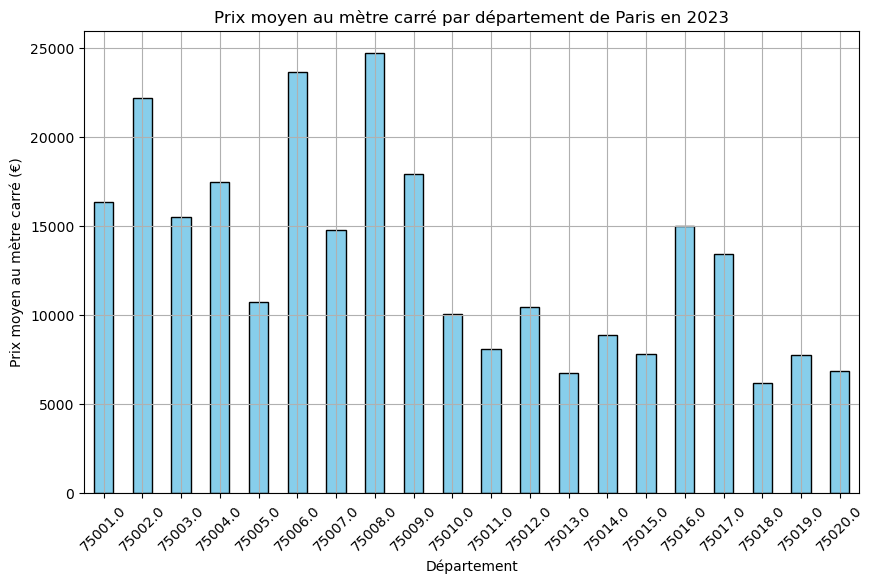

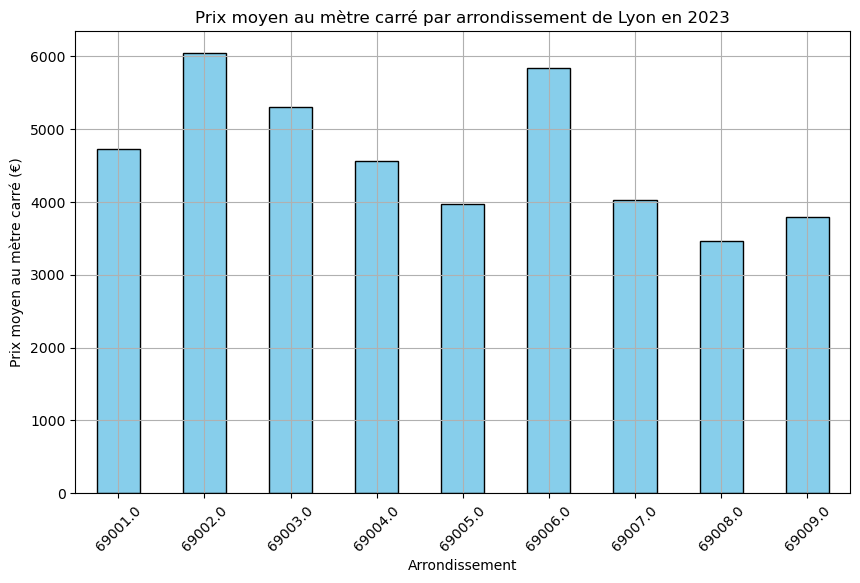

In [857]:
plt.figure(figsize=(12, 8))

# Créer un diagramme en barres pour visualiser les prix moyens au mètre carré par département
plt.figure(figsize=(10, 6))
prix_moyen_par_departement.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Prix moyen au mètre carré par département de Paris en 2023')
plt.xlabel('Département')
plt.ylabel('Prix moyen au mètre carré (€)')
plt.xticks(rotation=45)
plt.grid(True)

# Créer un diagramme en barres pour visualiser les prix moyens au mètre carré par département
plt.figure(figsize=(10, 6))
prix_moyen_par_departement_lyon.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Prix moyen au mètre carré par arrondissement de Lyon en 2023')
plt.xlabel('Arrondissement')
plt.ylabel('Prix moyen au mètre carré (€)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Apprentissage non supervisé - KMeans

Dans cette partie, on cherche à prédire la surface totale d'un bien immobilier grâce à sa valeur foncière, la nature de la culture et le nombre de pièces.

1. Variable cible et variables caractéristiques

In [41]:
df1_cleaned_Kmeans_X = df1_cleaned[['Surface Totale', 'Valeur fonciere', 'Nature culture', 'Nombre pieces principales']]
df1_cleaned_Kmeans_X

,Surface Totale,Valeur fonciere,Nature culture,Nombre pieces principales
3646585,260.21,1825000.00,-1,0.0
3646586,52.00,567000.00,-1,0.0
3646587,36.75,140000.00,-1,1.0
3646588,86.80,400000.00,-1,1.0
3646589,11.40,141343.12,-1,0.0
...,...,...,...,...
3726993,18.00,145000.00,-1,2.0
3726994,26.00,212000.00,-1,1.0
3726995,15.00,144000.00,-1,1.0
3726998,206.00,3931000.00,-1,6.0


In [42]:
df1_cleaned_Kmeans_X.isnull().sum()

Surface Totale               0
Valeur fonciere              0
Nature culture               0
Nombre pieces principales    0
dtype: int64

2. Import des modules

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from matplotlib.collections import LineCollection

3. Standardisation des données

In [44]:
scaler = StandardScaler()
scaler.fit(df1_cleaned_Kmeans_X[['Valeur fonciere', 'Nombre pieces principales', 'Nature culture']])
scaled_data = scaler.transform(df1_cleaned_Kmeans_X[['Valeur fonciere', 'Nombre pieces principales', 'Nature culture']])
scaled_data = pd.DataFrame(scaled_data, columns=df1_cleaned_Kmeans_X[['Valeur fonciere', 'Nombre pieces principales', 'Nature culture']].columns)
scaled_data

,Valeur fonciere,Nombre pieces principales,Nature culture
0,-0.021540,-0.989268,-0.226625
1,-0.069715,-0.989268,-0.226625
2,-0.086068,-0.346985,-0.226625
3,-0.076111,-0.346985,-0.226625
4,-0.086016,-0.989268,-0.226625
...,...,...,...
51515,-0.085876,0.295298,-0.226625
51516,-0.083310,-0.346985,-0.226625
51517,-0.085914,-0.346985,-0.226625
51518,0.059110,2.864431,-0.226625


4. Méthode du coude (Elbow Method)

In [45]:
inerties = []
for i in range(1, 21): 
    model = KMeans(n_clusters=i, init='k-means++')
    model.fit(scaled_data)
    inerties.append(model.inertia_)

Text(0.5, 1.0, 'Elbow Method')

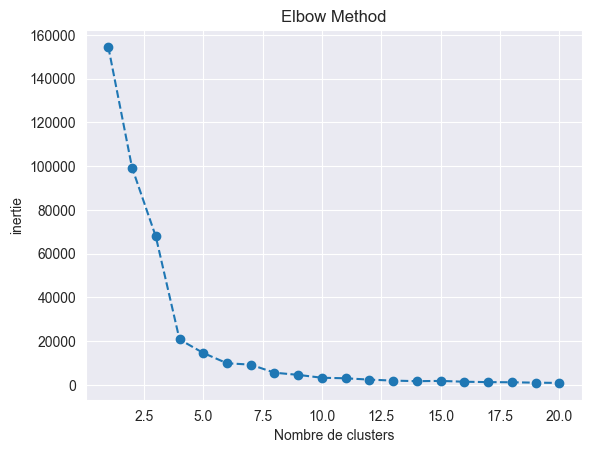

In [46]:
plt.plot(range(1, 21), inerties, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel('inertie')
plt.title('Elbow Method')

On observe que le coude est à 4 clusters. On choisira donc 4 clusters pour notre modèle Kmeans.

4. Modélisation

In [47]:
model = KMeans(4, init='k-means++')
model.fit(scaled_data)

KMeans(n_clusters=4)

In [48]:
df1_cleaned_Kmeans_X['Cluster'] = model.labels_
df1_cleaned_Kmeans_X

C:\Users\marte\AppData\Local\Temp\ipykernel_10624\988617694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned_Kmeans_X['Cluster'] = model.labels_


,Surface Totale,Valeur fonciere,Nature culture,Nombre pieces principales,Cluster
3646585,260.21,1825000.00,-1,0.0,1
3646586,52.00,567000.00,-1,0.0,1
3646587,36.75,140000.00,-1,1.0,1
3646588,86.80,400000.00,-1,1.0,1
3646589,11.40,141343.12,-1,0.0,1
...,...,...,...,...,...
3726993,18.00,145000.00,-1,2.0,0
3726994,26.00,212000.00,-1,1.0,1
3726995,15.00,144000.00,-1,1.0,1
3726998,206.00,3931000.00,-1,6.0,0


5. PCA

On utilise l'ACP pour visualiser les clusters en réduisant la dimension (même si dans notre cas 3 dimensions sont encore visualisables).

In [49]:
pca = PCA(n_components=3)
pca.fit(scaled_data)
df_pca = pca.transform(scaled_data)
df_pca

array([[-0.1874876 , -0.99294158, -0.09690087],
       [-0.22154032, -0.99087633, -0.06288572],
       [-0.22532158, -0.34869569, -0.08250195],
       ...,
       [-0.2252133 , -0.34870226, -0.0826101 ],
       [-0.08381733,  2.85247888, -0.34081668],
       [-0.2264517 , -0.34862715, -0.08137307]])

In [50]:
explained_variance = pca.explained_variance_ratio_

Text(0, 0.5, 'Variance Expliquée cumulées')

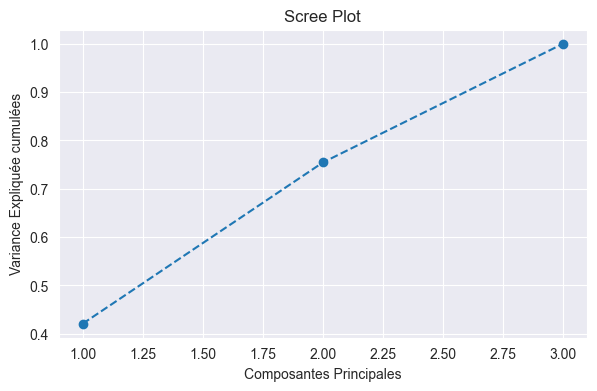

In [51]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Composantes Principales')
plt.ylabel('Variance Expliquée cumulées')

On peut voir que les deux premières composantes principales expliquent environ 76% de la variance. On peut donc les utiliser pour visualiser les clusters.

In [52]:
pca = PCA(n_components=2).fit(scaled_data)
projected = pca.transform(scaled_data)

La fonction suivante permet d'afficher les cercles des corrélations des variables avec les axes du plan factoriel. [GitHub](https://github.com/formasys/clustering/blob/main/crime_usa.ipynb)

In [53]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if xmin <= x <= xmax and ymin <= y <= ymax:
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')
			
            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
		
            plt.show(block=False)
		

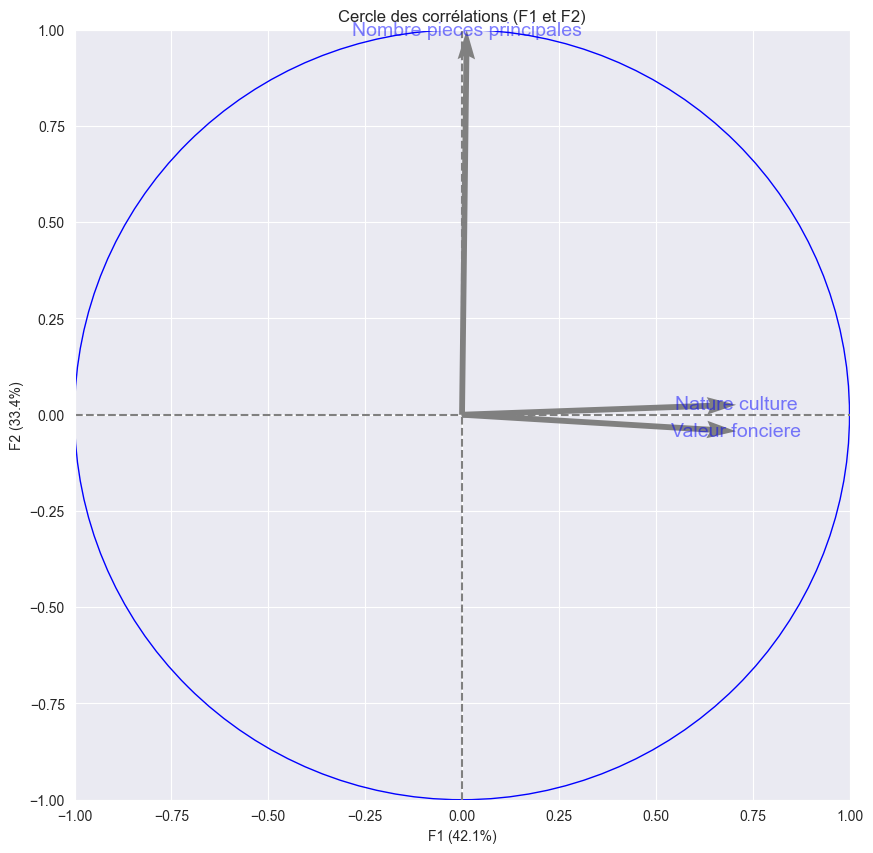

In [54]:
display_circles(pca.components_, 2, pca, [(0,1)], labels=np.array(scaled_data.columns), label_rotation=0)

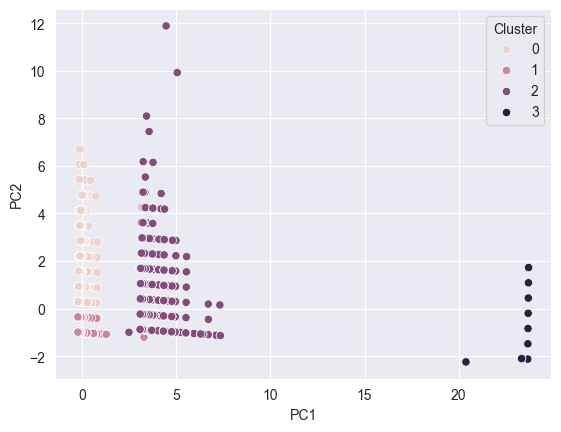

In [55]:
sns.scatterplot(x=projected[:, 0], y=projected[:, 1], hue=df1_cleaned_Kmeans_X['Cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Si on se déplace vers la droite, en déscendant un peu  la valeur foncière augmente, et en montant un peu la nature de la culture change. Lorsqu'on monte le nombre de pièces augmente. Ainsi le cluster le plus à droite correspond aux valeurs foncières les plus élevées observé précédemment.

In [56]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_score(scaled_data,model.fit_predict(scaled_data))

0.6354849538073937

Les clusters sont bien séparés et les échantillons au sein de chaque cluster sont relativement compacts. De plus on obtient un score de silhouette de 0.63 ce qui est un plutôt bon score.

## Apprentissage supervié - Régression linéaire

On utilisera la surface totale, la nature de la mutation, et l'arrondissement pour prédire la valeur foncière d'un appartement.

On utilisera la surface totale, la surface réelle bati, l'arrondissement et le nombres de pieces principales pour prédire la valeur foncière d'un appartement.

In [57]:
# Filtrer pour les appartements dans le département de Paris (75)
paris_apartments = df1_cleaned_with_dates[
    (df1_cleaned_with_dates['Code departement'] == 75) & (df1_cleaned_with_dates['Code type local'] == 2)]

# Supprimer les colonnes inutiles pour la prédiction
columns_to_drop = ['Date mutation', 'Nature mutation', 'No voie', 'Type de voie', 'Code postal', 'Code commune',
                   'Prefixe de section', 'Section', 'No plan', 'Code type local', 'Nature culture',
                   'Nature culture speciale', 'Année', 'Mois']
paris_apartments = paris_apartments.drop(columns=columns_to_drop, errors='ignore')

# Supprimer les lignes avec des valeurs manquantes dans les colonnes essentielles
paris_apartments = paris_apartments.dropna(
    subset=['Valeur fonciere', 'Surface Totale', 'Nombre pieces principales'])

paris_apartments.head()

,Valeur fonciere,Code departement,Nombre pieces principales,Surface Totale
3646587,140000.0,75,1.0,36.75
3646588,400000.0,75,1.0,86.80
3646590,295000.0,75,2.0,28.00
3646592,300400.0,75,2.0,72.11
3646597,213000.0,75,1.0,27.00


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparer les caractéristiques (features) et la cible (target)
X = paris_apartments[['Surface Totale', 'Nombre pieces principales']]
y = paris_apartments['Valeur fonciere']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Entraîner et évaluer différents modèles
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {
        'y_pred': y_pred,
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    }

results_df = pd.DataFrame(results).T
print(results_df)

y_pred_gradient_boosting = results_df.loc['Gradient Boosting', 'y_pred']

Les résultats montrent que les modèles d'ensemble comme Random Forest et Gradient Boosting sont bien adaptés à la prédiction des prix des appartements par rapport à la régression linéaire dans ce contexte.

C:\Users\marte\AppData\Local\Temp\ipykernel_10624\3742944851.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([model for model in models], rotation=45, ha='right')


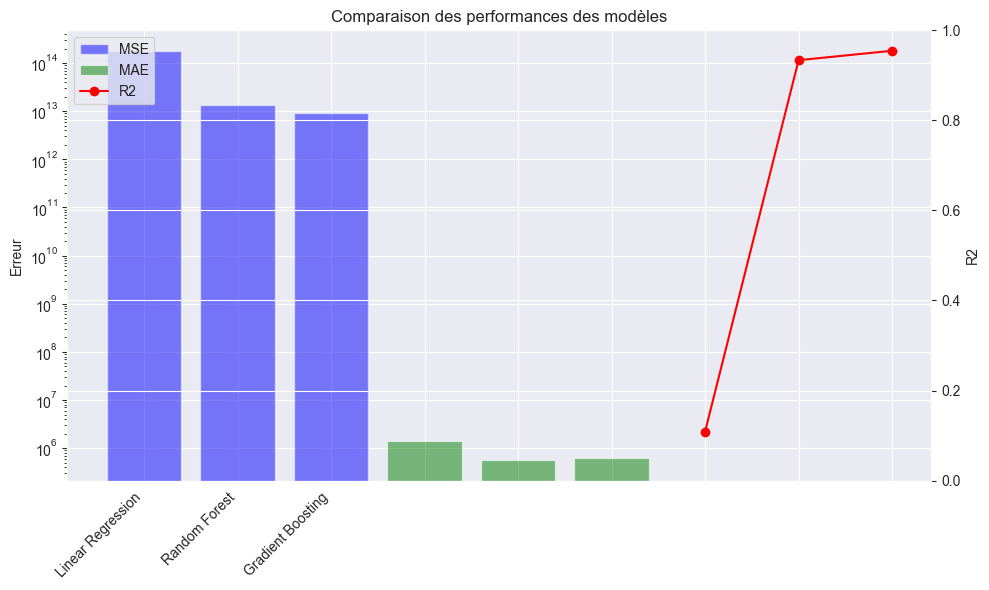

In [60]:
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
mse = [1.798592e+14, 1.337999e+13, 9.152269e+12]
mae = [1.393005e+06, 5.653743e+05, 6.169403e+05]
r2 = [0.108688, 0.933694, 0.954645]

# Création du graphique
fig, ax1 = plt.subplots(figsize=(10, 6))

bars_mse = ax1.bar([model + ' (MSE)' for model in models], mse, color='b', alpha=0.5, label='MSE')
bars_mae = ax1.bar([model + ' (MAE)' for model in models], mae, color='g', alpha=0.5, label='MAE')

# Axe y pour MSE et MAE
ax1.set_ylabel('Erreur')
ax1.set_yscale('log')

# Axe y pour R2
ax2 = ax1.twinx()
line_r2 = ax2.plot([model + ' (R2)' for model in models], r2, marker='o', color='r', label='R2')
ax2.set_ylabel('R2')
ax2.set_ylim(0, 1)

# Inclinaison des étiquettes de l'axe x
ax1.set_xticklabels([model for model in models], rotation=45, ha='right')

# Titre et légende
ax1.set_title('Comparaison des performances des modèles')
ax1.legend(handles=[bars_mse, bars_mae, line_r2[0]], labels=['MSE', 'MAE', 'R2'], loc='upper left')

plt.tight_layout()
plt.show()

On voit ici que le Gradient Boosting est le modèle d'ensemble Gradient Boosting est le plus adapté car il possède le plus petit MSE, un petit MAE et le plus grand R2.

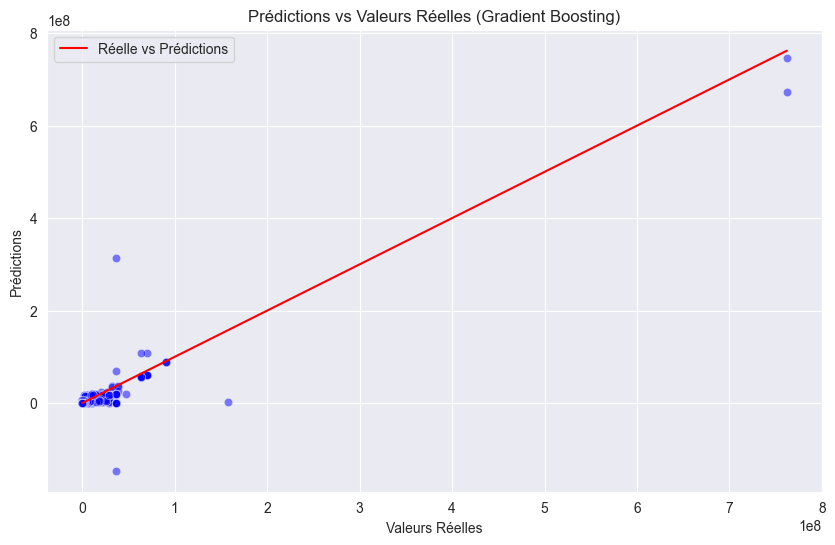

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un graphique de dispersion avec ligne de tendance
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gradient_boosting, color='b', alpha=0.5)
sns.lineplot(x=y_test, y=y_test, color='r', label='Réelle vs Prédictions')  # Ligne y = x pour la référence
plt.title('Prédictions vs Valeurs Réelles (Gradient Boosting)')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.legend()
plt.show()

On peut voir que globalement notre modèle Gradient Boosting est le plus performant car nos tuples Prédictions - Réalités sont pour certains proche de la droite de tendance.